In [1]:
import time
from astropy.table import Table, Column
from sklearn import preprocessing
import os
import numpy as np
import matplotlib.pyplot as plt
#import astropy.io.fits as pyfits
#import numpy as np
start_time=time.time()
# selection parameters
tab=Table.read('C4N5REWs_DR12v11_all.fits')
z_dr12=tab['z_dr12']
ABw3_snr=tab['ABw3_snr']

rew_gf=tab['rew_gf']
rewe_gf=tab['rewe_gf']
ratio_rew=  rew_gf/rewe_gf#tab['rewsnr_gf']
fwhm=tab['fwhm_gf']
fwhme=tab['fwhme_gf']
ratio_fwhm= fwhm/fwhme #tab['fwhmsnr_gf']
qflag=tab['qflag']
nvflag=tab['nvflag']
imw3= tab['i-w3']
# W3=tab['W3']
bal_flag_vi = tab['bal_flag_vi']
ccFlag = tab['cc_flags']
bi_civ = tab['bi_civ']
err_bi_civ = tab['err_bi_civ']
# making new table

In [2]:
#count=-1
row=len(tab)
rm=[]
k = 0
j = 0
m = 0
# (bal_flag_vi[i] > 0) or (nvflag[i] != 0) or 
for i in range(0,row):
    if    (fwhm[i]<2000) or  ((imw3[i]) < 0.8) or (z_dr12[i]<2.0) or (z_dr12[i]>3.4)\
        or (ratio_fwhm[i] < 4) or (qflag[i] != 0) or (ccFlag[i]!='0000') or\
        (ABw3_snr[i] < 3) or (ratio_rew[i] < 3.0) or (nvflag[i] != 0):
                        
             rm.append(i)
    else:
        k = k+1
        if imw3[i] >= 4.6:
            j = j+1
#             print(tab['sdss_name'][i])
        if imw3[i] >= 4.6 and rew_gf[i] >= 100.0: 
            m = m+1   
            
      


print('Full=', row, 'total T1s =',k, ', T1 ERQs =', j, ', core T1 ERQs =', m)

tab.remove_rows(rm)
out='FullSample.fits'
if os.path.exists(out):
      os.remove(out)

tab.write(out)

Full= 217030 total T1s = 35976 , T1 ERQs = 154 , core T1 ERQs = 72


In [3]:
i = tab['ABi']
W3 = tab['ABw3']

In [4]:
np.max(abs(i-W3-tab['i-w3']))

0.0

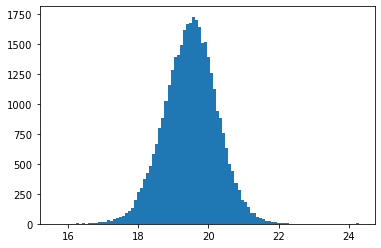

In [5]:
plt.hist(i, bins=100)
plt.show()

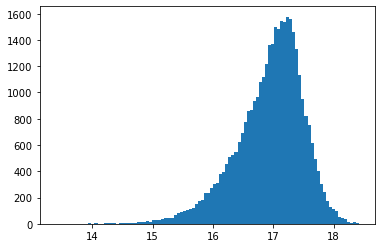

In [6]:
plt.hist(W3, bins=100)
plt.show()

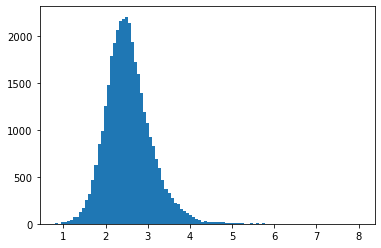

In [7]:
plt.hist(tab['i-w3'], bins=100)
plt.show()

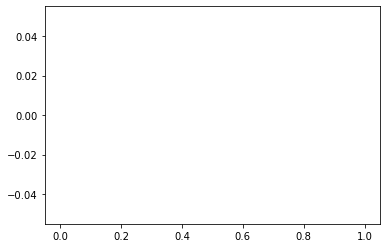

In [8]:
plt.hist(i[i-W3<=0.8])
plt.show()

In [9]:
i[i-W3<=0.8]

<Column name='ABi' dtype='float64' length=0>

Text(0, 0.5, 'i-w3')

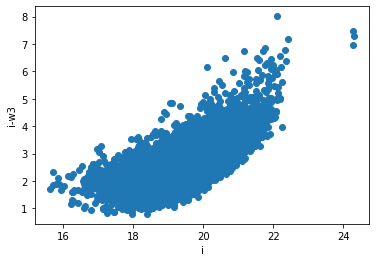

In [11]:
plt.scatter(tab['ABi'], tab['i-w3'])
plt.xlabel('i')
plt.ylabel('i-w3')

Text(0, 0.5, 'i-w3')

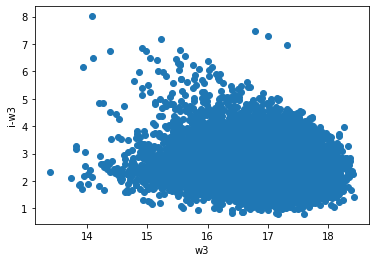

In [12]:
plt.scatter(tab['ABw3'], tab['i-w3'])
plt.xlabel('w3')
plt.ylabel('i-w3')

Text(0, 0.5, 'w3')

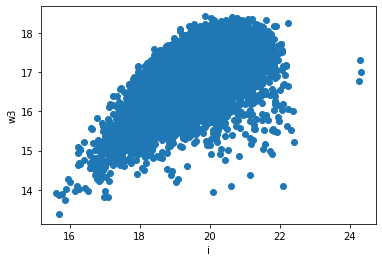

In [13]:
plt.scatter(tab['ABi'], tab['ABw3'])
plt.xlabel('i')
plt.ylabel('w3')

In [14]:
max(tab['ABi'])

24.305331684

In [23]:
tab['i-w3'][tab['ABi']>22.4]

6.9558861950000015
7.486202749
7.309331683999996
7.192147116000001


In [18]:
tab['rew_gf'][tab['ABi']>23]

58.87249457002831
32.311264922894175
46.86756259507773
